In [1]:
# Packages
import h5py
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt

In [16]:
def plot_moon(moon, path, tidal=False, kozai=False):
    
    if kozai:
        name = 'k.hdf5'
        total_name = path+moon+'_'+name
        res = h5py.File(total_name, 'r')
    if tidal:
        total_name = path+'tidal_'+moon+'.hdf5'
        res = h5py.File(total_name, 'r')
    
    #if moon=='io':
    #    res = h5py.File(path+'io_'+ name)
    #if moon=='eu':
    #    res = h5py.File(path+'eu_'+ name)
    #if moon=='ga':
    #    res = h5py.File(path+'ga_'+ name)
    #if moon=='ca':
    #    res = h5py.File(path+'ca_'+ name)
    #    if tidal:
    #        res = h5py.File(path+name)

    ecc = res['ecc'][:]
    inc = res['inc'][:]
    sma = res['sma'][:]
    time_range = res['time'][:]

    plt.rcParams.update({'font.size': 20})
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=[20, 15], tight_layout=True)
    colours = ['r', 'g', 'b', 'm']

    ax1.plot(time_range, inc, color=colours[0], label=moon)   
    ax1.set_ylabel('Inc [deg]')
    ax1.set_xlabel('t [yr]')
    ax1.legend()

    ax2.plot(time_range, ecc, color=colours[1], label=moon)   
    ax2.set_ylabel('Ecc')
    ax2.set_xlabel('t [yr]')
    ax2.legend()

    ax3.plot(time_range, sma, color=colours[2], label=moon)   
    ax3.set_ylabel('SMA')
    ax3.set_xlabel('t [yr]')
    ax3.legend()
    
    porb = np.array(sma) * (1-np.array(ecc))
    ax4.plot(time_range, porb, color=colours[3], label=moon)
    ax4.set_ylabel('Periapsis')
    ax4.set_xlabel('t [yr]')

    res.close()
    plt.show()
    
def plot_moon_tidal_only(moon, path, xmax=1e6, ecc_range=None, save=False, save_path='plots/'):
    if moon == 'io':
        full_name = 'Io'
    elif moon == 'eu':
        full_name = 'Europa'
    elif moon == 'ga':
        full_name = 'Ganymedes'
    elif moon == 'ca':
        full_name = 'Callisto'
        
    res = h5py.File(path+'tidal_'+moon+'.hdf5', 'r')
    
    ecc = res['ecc'][:]
    time_range = res['time'][:]
    
    plt.rcParams.update({'font.size': 20})
    fig, ax1 = plt.subplots(1, 1, figsize=[20, 3.75], tight_layout=True)
    
    ax1.plot(time_range, ecc)   
    ax1.set_ylabel('Ecc')
    ax1.set_xlabel('t [yr]')
    ax1.set_title(full_name)
    ax1.set_xlim(0,xmax)
    ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
    if ecc_range != None:
        ax1.set_ylim(ecc_range)
    
    if save:
        file_name = moon+'_tidal.png'
        plt.savefig(save_path+file_name)
    
    plt.show()
    res.close()

def plot_moon_with_kozai(moon, path, xmax=1e6, inc_range=None, ecc_range=None, save=False, save_path='plots/'):
    if moon == 'io':
        full_name = 'Io'
    elif moon == 'eu':
        full_name = 'Europa'
    elif moon == 'ga':
        full_name = 'Ganymedes'
    elif moon == 'ca':
        full_name = 'Callisto'
    
    res = h5py.File(path+moon+'.hdf5', 'r')
    
    ecc = res['ecc'][:]
    inc = res['inc'][:]
    time_range = res['time'][:]
    
    plt.rcParams.update({'font.size': 20})
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[20, 7.5], tight_layout=True, sharex=True)
    
    ax1.plot(time_range, inc)   
    ax1.set_ylabel('Inc [deg]')
    #ax1.set_xlabel('t [yr]')
    ax1.set_title('Inclination and Eccentricity '+full_name)
    ax1.set_xlim(0,xmax)
    ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
    if inc_range != None:
        ax1.set_ylim(inc_range)
    
    ax2.plot(time_range, ecc)   
    ax2.set_ylabel('Ecc')
    ax2.set_xlabel('t [yr]')
    ax2.set_xlim(0,xmax)
    ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)
    if ecc_range != None:
        ax2.set_ylim(ecc_range)
    
    if save:
        file_name = moon+'_kozai_tidal.png'
        plt.savefig(save_path+file_name)
    
    plt.show()
    res.close()

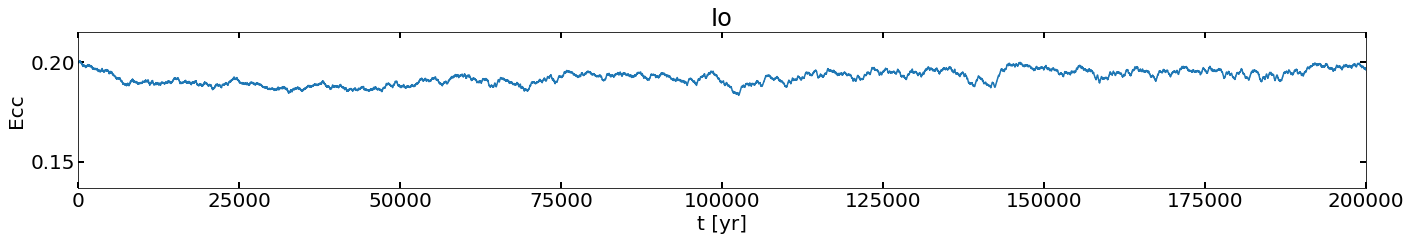

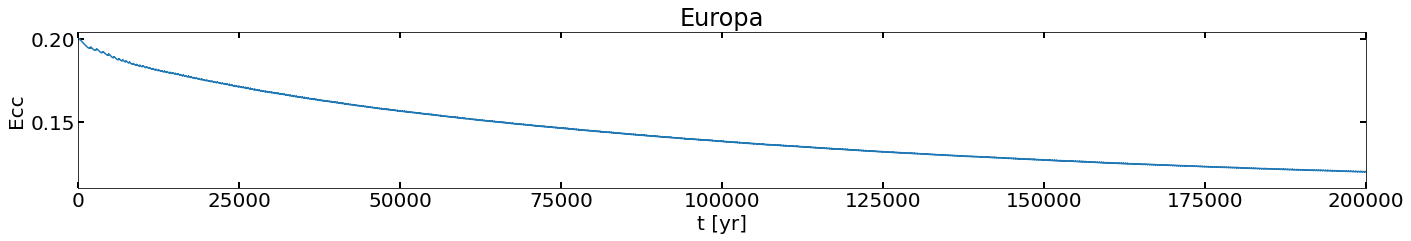

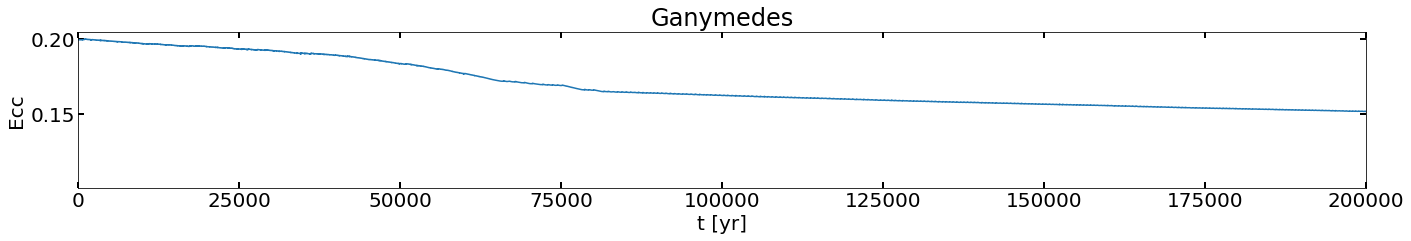

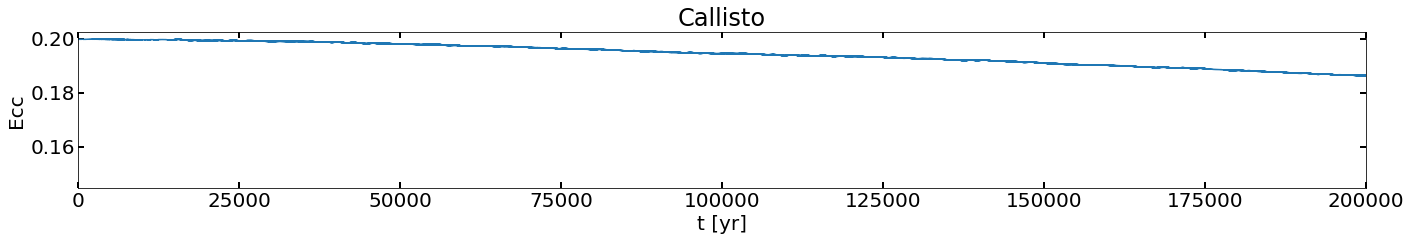

In [19]:
path = '/home/maarten/Documents/SMA/SMA_project/amuse-project/alice_data/'
save_path = '/home/maarten/Documents/SMA/SMA_project/amuse-project/plots/'
plot_moon_tidal_only('io',path=path,xmax=2e5,save=True,save_path=save_path)
plot_moon_tidal_only('eu',path=path,xmax=2e5,save=True,save_path=save_path)
plot_moon_tidal_only('ga',path=path,xmax=2e5,save=True,save_path=save_path)
plot_moon_tidal_only('ca',path=path,xmax=2e5,save=True,save_path=save_path)

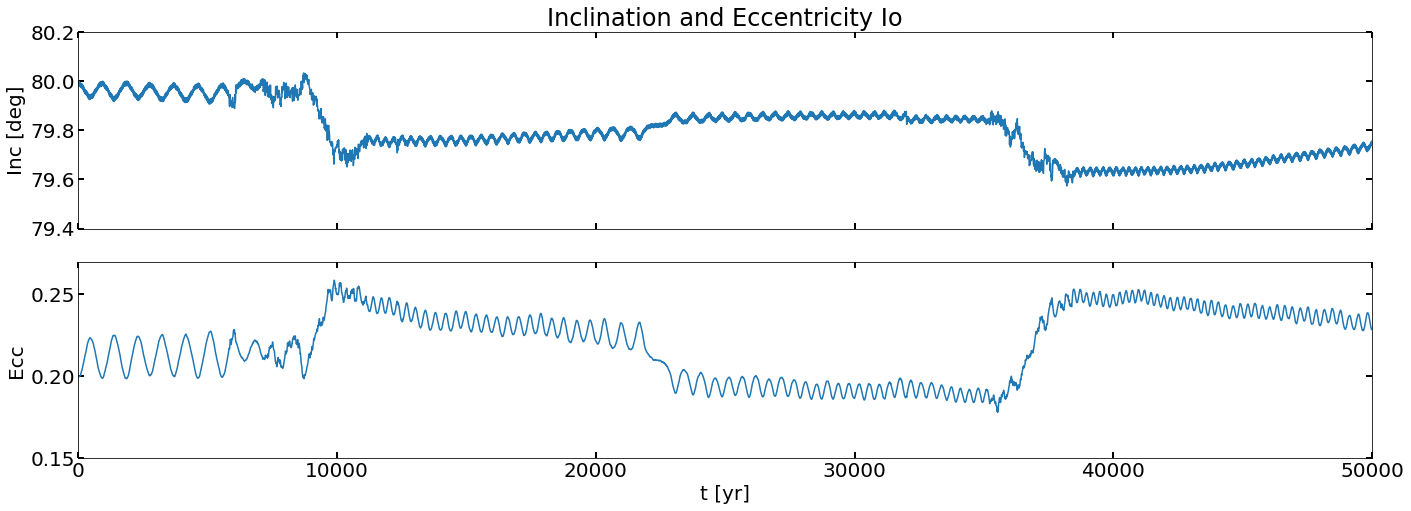

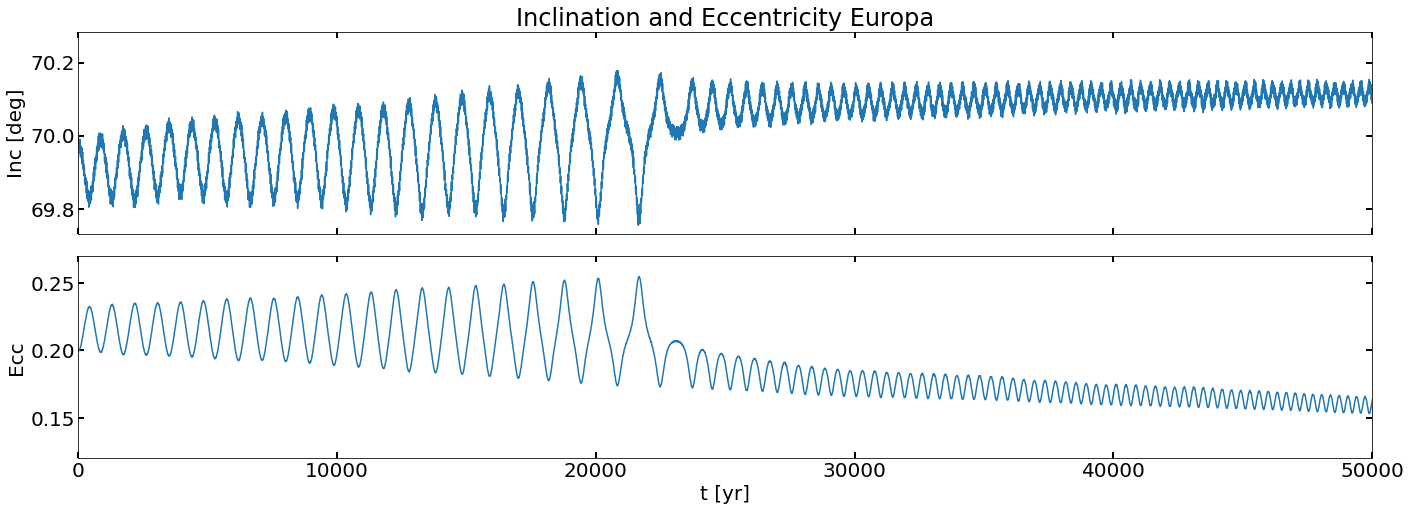

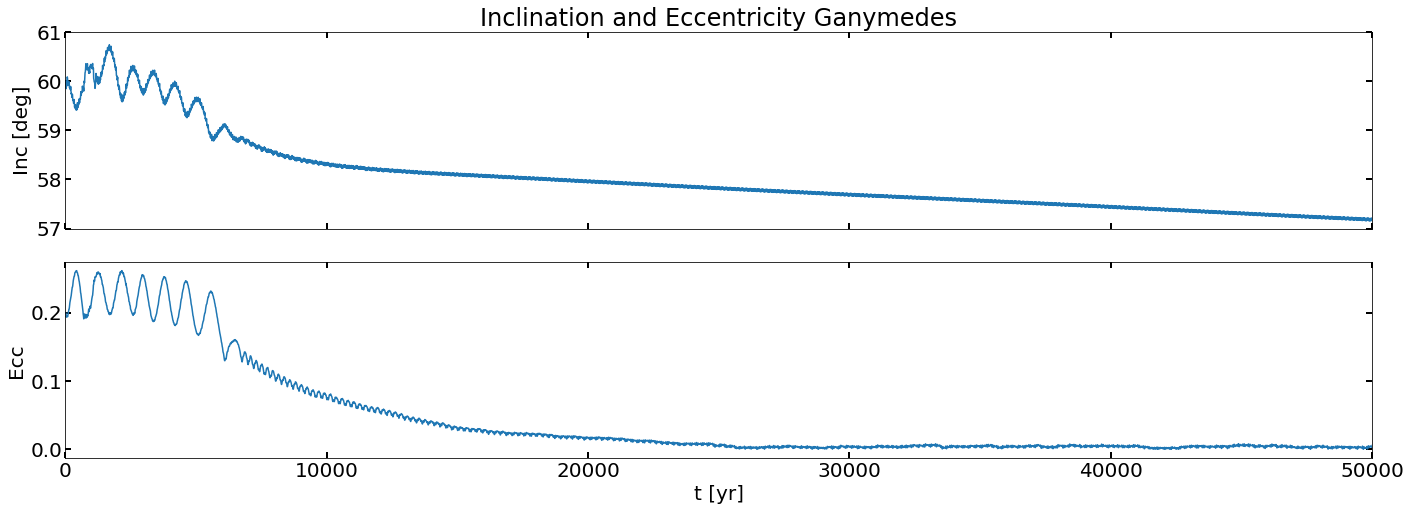

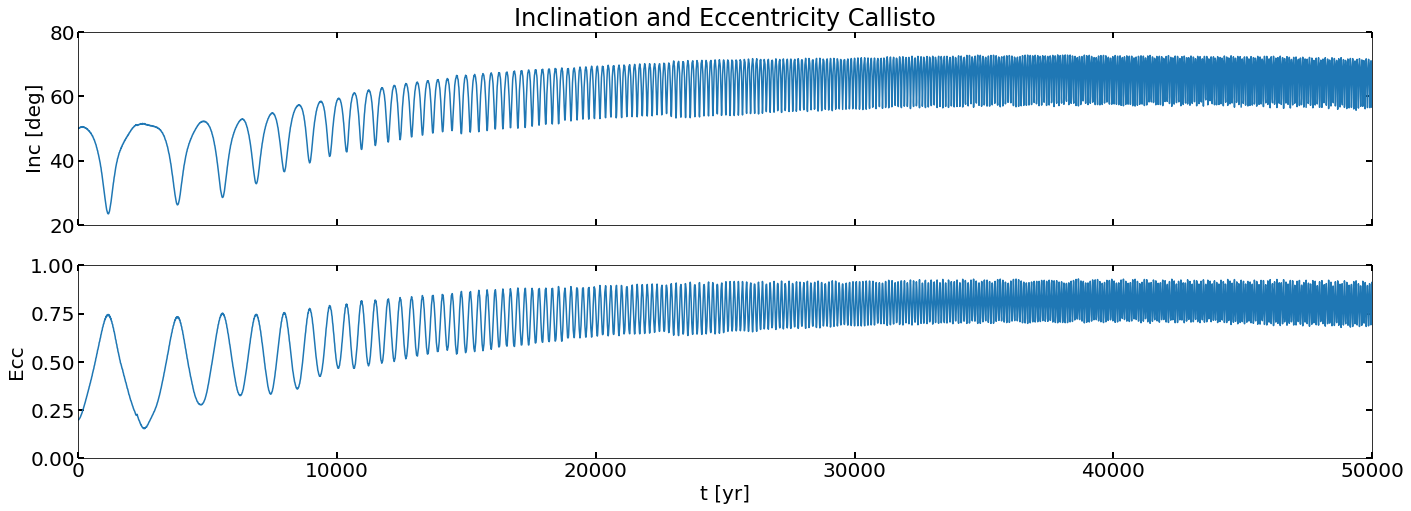

In [18]:
path = '/home/maarten/Documents/SMA/SMA_project/amuse-project/alice_data/'
save_path = '/home/maarten/Documents/SMA/SMA_project/amuse-project/plots/'
plot_moon_with_kozai('io',path=path,save=True,xmax=5e4,inc_range=(79.4,80.2),ecc_range=(0.15,0.27),save_path=save_path)
plot_moon_with_kozai('eu',path=path,save=True,xmax=5e4,ecc_range=(0.12,0.27),save_path=save_path)
plot_moon_with_kozai('ga',path=path,save=True,xmax=5e4,inc_range=(57,61),save_path=save_path)
plot_moon_with_kozai('ca',path=path,save=True,xmax=5e4,inc_range=(20,80),ecc_range=(0,1),save_path=save_path)

In [30]:
def plot_params(name, savefig=False):
    
    path = '/home/astrobrez/Amuse-env/amuse-project/new_data/'
    res = h5py.File(path+name)

    plt.rcParams.update({'font.size': 25})
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20, 10), tight_layout=True, facecolor='w')
    
    moons = list(res.keys())
    props = list(res[moons[0]].keys())
    time = res[moons[0]][props[3]][:]
    
    for i in range(4):

        ecc = res[moons[i]][props[0]][:]
        inc = res[moons[i]][props[1]][:]
        #sma = res[moons[i]][props[2]][:]

        ax1.plot(time, ecc, label=moons[i])
        ax2.plot(time, inc, label=moons[i])
        #ax3.plot(time, sma, label=moons[i])
        
        ax1.set_ylabel('ecc')
        ax2.set_ylabel('inc')
        #ax3.set_ylabel('sma')
        
#         ax1.set_xlim([0,100])
#         ax2.set_xlim([0,650])
#         ax3.set_xlim([0,650])
        
#         ax1.set_ylim([0,1])
#         ax2.set_ylim([20,80])
#         ax3.set_ylim([0,3e9])
        
        ax2.set_xlabel('t [yr]')
        ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
        ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)
        #ax3.tick_params(direction='in', length=6, width=2, top=True, right=True)

        
        ax1.legend()
        ax2.legend()
        #ax3.legend()
        
    if savefig:
        plt.savefig('final_result.png', dpi=300, facecolor='w', bbox_inches='tight')
    plt.show()

    res.close()

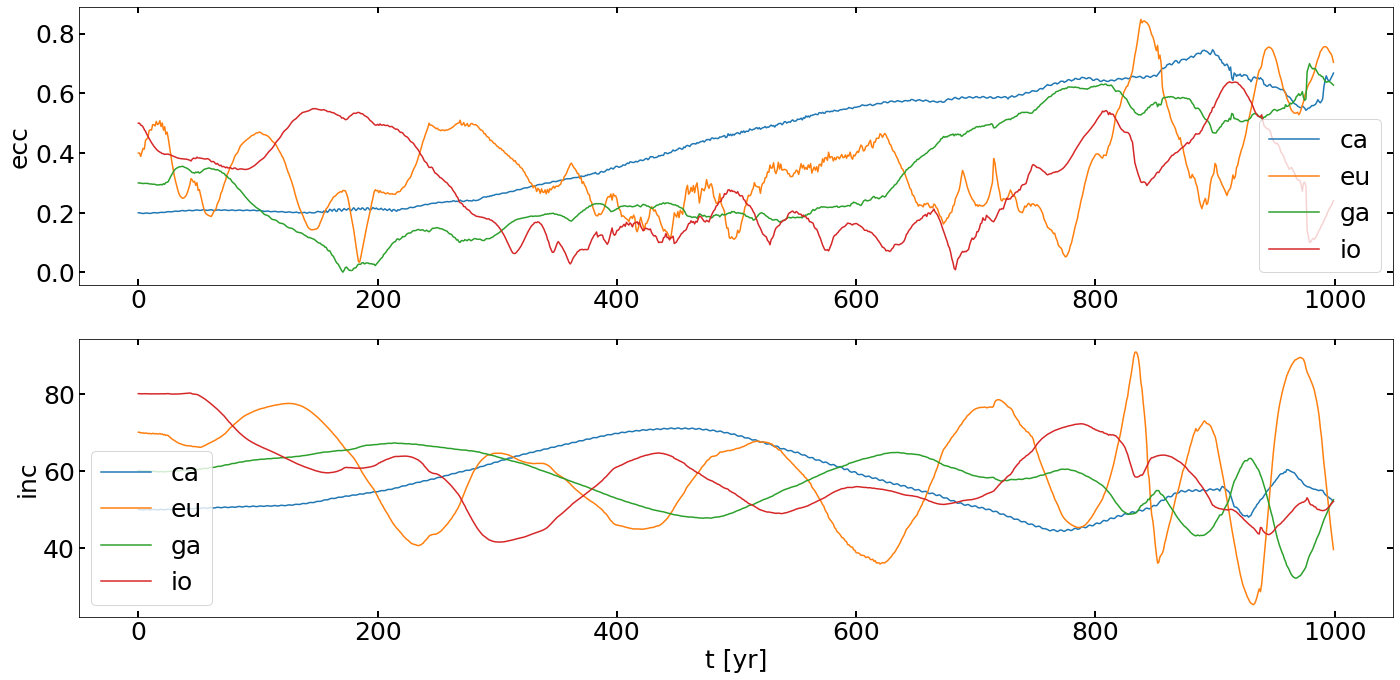

In [31]:
plot_params('ecc_varied.hdf5', savefig=True)

In [100]:
res.close()

In [93]:
def plot_params(e=True):
    
    path = 'param_space/'
    res = h5py.File(path+'p_space.hdf5')
    time_range = res['0']['init']['t'][:]

    fig, axis = plt.subplots(5, 2, figsize=(20, 15), tight_layout=True)
    allaxes = np.array(fig.get_axes())
    axes = allaxes.ravel()
    
    colors = ['r', 'b', 'g', 'm']
    moons = ['io', 'eu', 'ga', 'ca']
        
    for i, ax in enumerate(axes):
        
        x = list(res.keys())
        
        for j in range(4):
            if e:
                name = 'Ecc'
                ecc = res[x[i]][moons[j]]['ecc'][:]
                ax.plot(time_range, ecc, c=colors[j])
            else:
                name = 'Inc'
                inc = res[x[i]][moons[j]]['inc'][:]
                
            ax.set_title(x[i], fontsize=14)
            
            #ax.set_xlabel('t [yr]', fontsize=14)
            #ax.set_ylabel('e', fontsize=14, rotation=1, labelpad=8)

    plt.suptitle(name, fontsize=20)
    plt.show()
    #plt.savefig('{}.png'.format(x[j]), facecolor='w', bbox_inches='tight')

    res.close()